<a href="https://colab.research.google.com/github/peaysararn/ML/blob/main/ML_practice_1_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from google.colab import files

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/peaysararn/ML/main/Housing.csv')
print('\n########## info ##########')
print(data.info())
print('\n########## describe ##########')
print(data.describe())


########## info ##########
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

########## describe ##########
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e

In [3]:
# Checking for duplicates
duplicates = data.duplicated()
duplicates = duplicates.unique()

if len(duplicates) == 1:
    print('There are no Duplicates in this Dataset')
else:
    print('There are Duplicates in the Dataset')

There are no Duplicates in this Dataset


In [4]:
df = data.copy()
print(df.head())
print('\n########## nunique ##########')
print(df.nunique())
print('\n########## unique ##########')
print(df['furnishingstatus'].unique())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

########## nunique ##########
price               219
area                284
bedrooms            

In [5]:
# data cleansing
df['mainroad'] = df['mainroad'].replace({'no': 0, 'yes': 1})
df['guestroom'] = df['guestroom'].replace({'no': 0, 'yes': 1})
df['basement'] = df['basement'].replace({'no': 0, 'yes': 1})
df['hotwaterheating'] = df['hotwaterheating'].replace({'no': 0, 'yes': 1})
df['airconditioning'] = df['airconditioning'].replace({'no': 0, 'yes': 1})
df['prefarea'] = df['prefarea'].replace({'no': 0, 'yes': 1})
df['furnishingstatus'] = df['furnishingstatus'].replace({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})
# df.head()

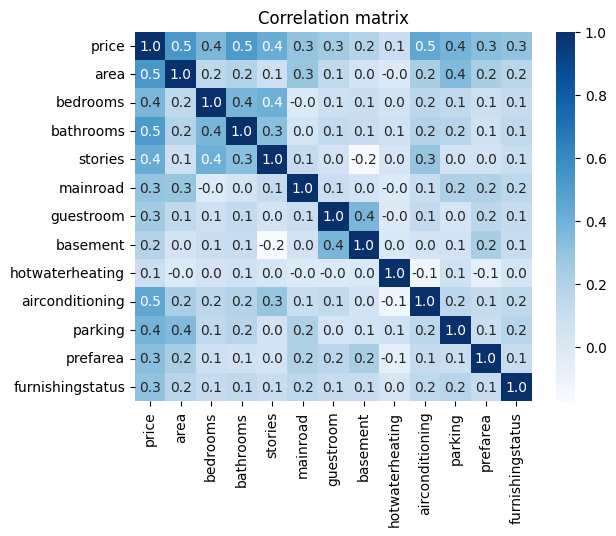

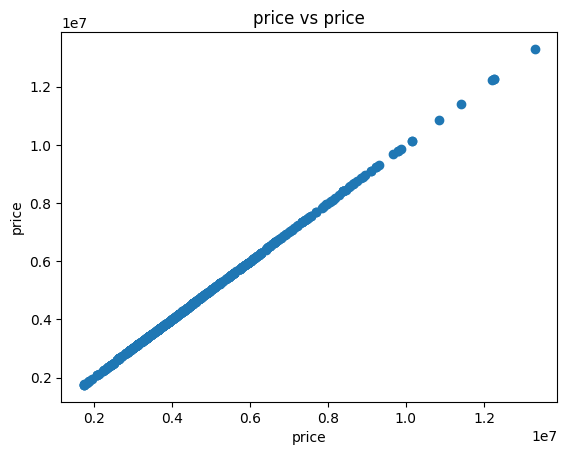

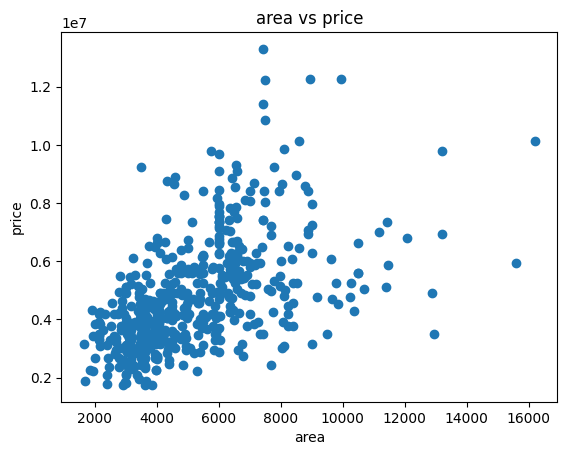

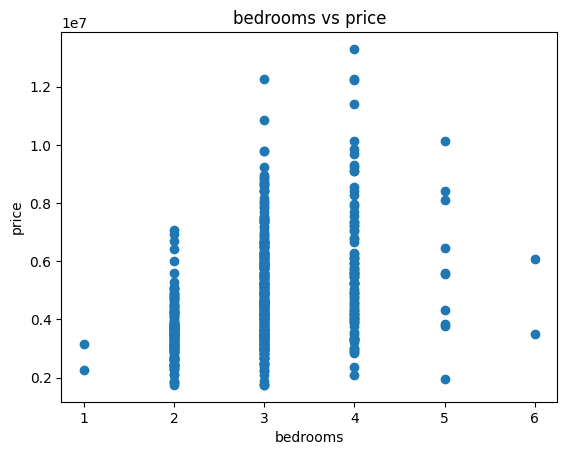

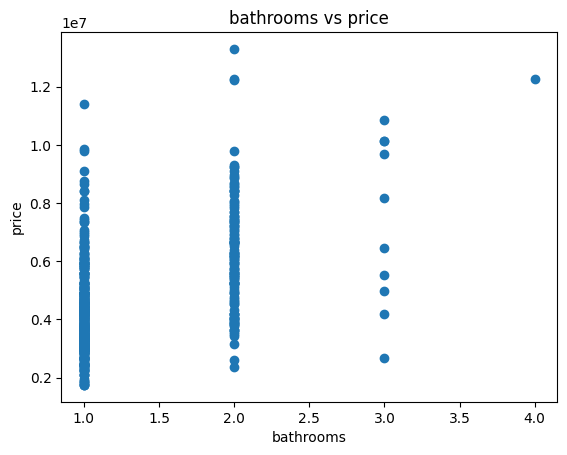

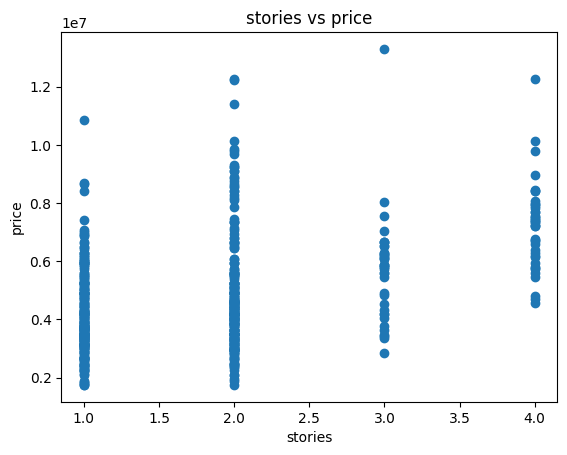

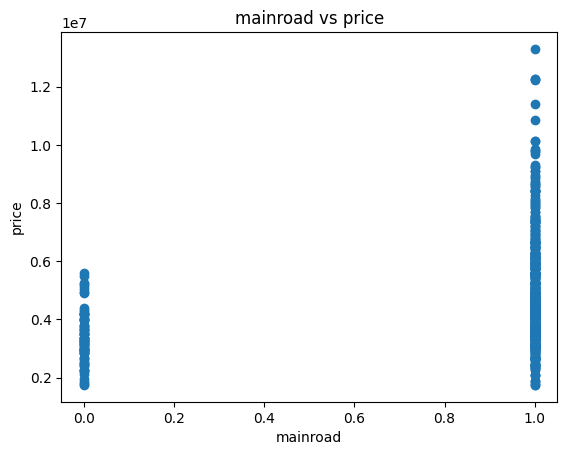

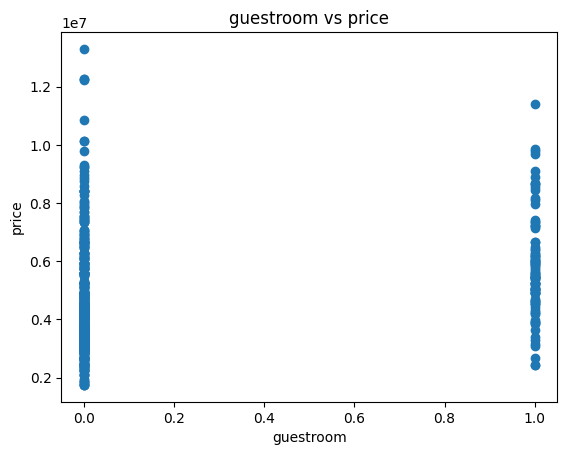

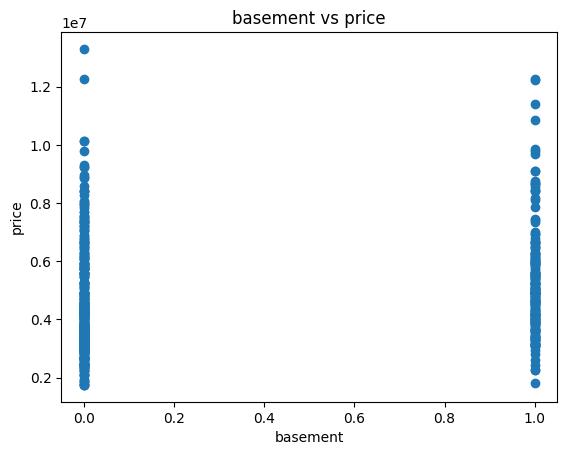

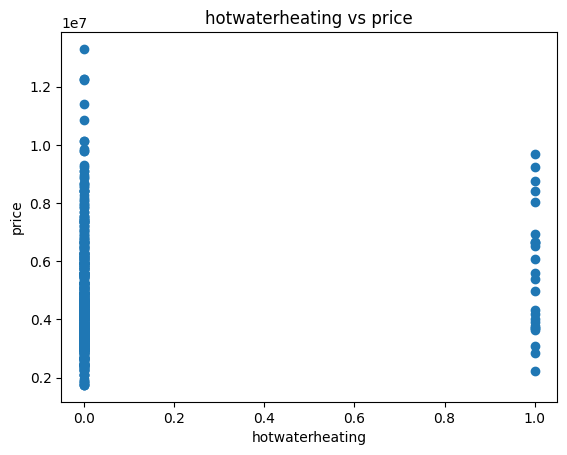

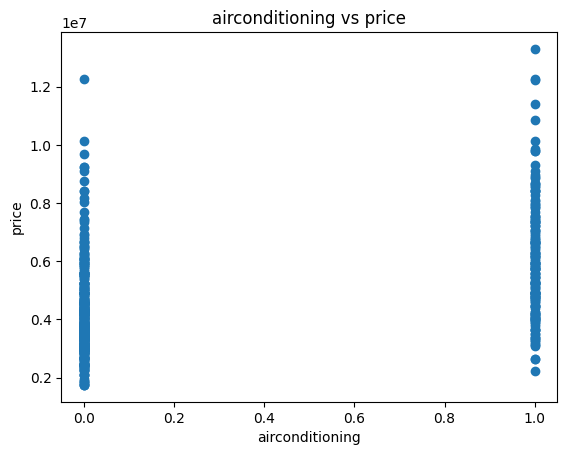

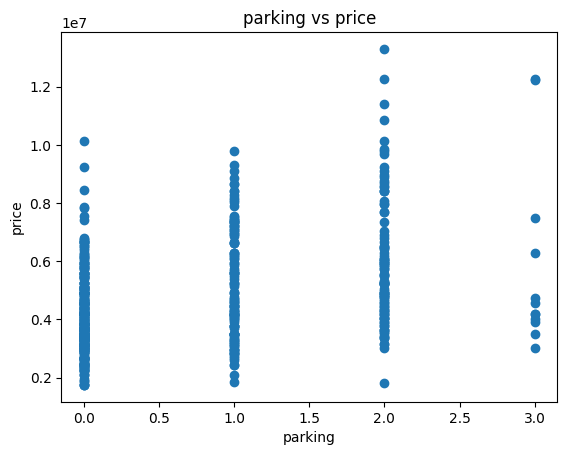

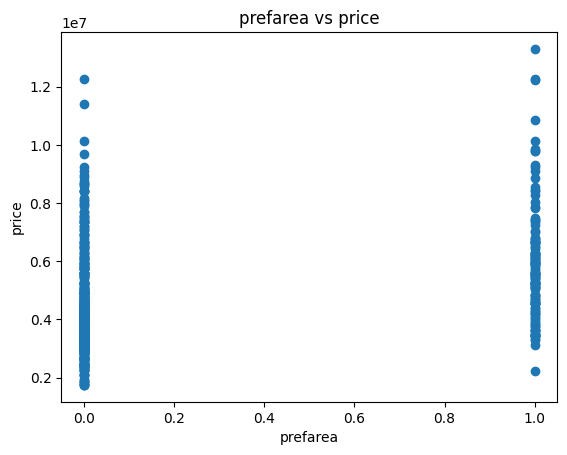

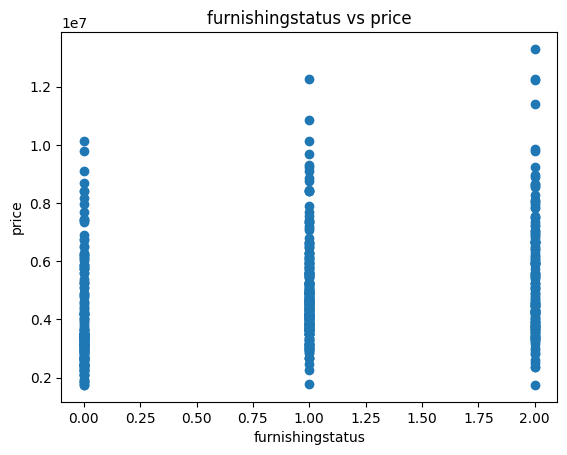

In [6]:
# correlation matrix
# df.corr()
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".1f")
plt.title('Correlation matrix')
plt.show()

# scatter plot
for i in range(len(df.columns)):
  plt.figure(i)
  plt.scatter(df.iloc[:, i], df['price'])
  plt.title(f'{df.columns[i]} vs price')
  plt.xlabel(df.columns[i])
  plt.ylabel('price')

plt.show()

In [7]:
# X = df.iloc[:,1:]
X = df.loc[:,['area','prefarea','mainroad','stories','basement','parking','bathrooms','airconditioning','furnishingstatus']]
# print(X.head())

In [8]:
y = df[["price"]]
# print(y.head())

In [9]:
# Train and test split data เป็นสัดส่วน 80:20 โดย 80 สำหรับ Train process และ 20 สำหรับ Test process
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [10]:
print('\n########## Train model ##########')
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print('\n########## theta0 ##########')
print(lin_reg.intercept_)
print('\n########## theta1, theta2, ... ##########')
print(lin_reg.coef_)


########## Train model ##########

########## theta0 ##########
[99900.15329988]

########## theta1, theta2, ... ##########
[[2.56890709e+02 4.65493954e+05 4.22380380e+05 4.92587614e+05
  5.08561460e+05 2.42751784e+05 8.97863888e+05 8.36750958e+05
  1.90998249e+05]]


In [11]:
print('\n########## Predict ##########')
y_h = lin_reg.predict(X_test)
print(y_h[:5])


########## Predict ##########
[[6204533.63631485]
 [6927454.95828409]
 [2771208.41703352]
 [4586753.73481304]
 [3641201.30666064]]


In [12]:
r2 = lin_reg.score(X_test, y_test)
print(f'{r2=}')

r2=0.6937755999828258


In [13]:
mse = mean_squared_error(y_test, y_h)
print(f'{mse=}')

mse=1609409054591.5417


In [14]:
"""Deploy"""
pickle.dump(lin_reg, open('ml_6610422018.sav','wb') )
files.download('ml_6610422018.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
#Apply polynomial regession with degree = 2 to the data
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_reg.fit_transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)


X_test_poly = poly_reg.fit_transform(X_test)
result = pol_reg.predict(X_test_poly)

print('polynomial regession degree = 2')
r2 = pol_reg.score(X_test_poly, y_test)
print(f'{r2=}')
mse = mean_squared_error(y_test, result)
print(f'{mse=}')

polynomial regession degree = 2
r2=0.6316651141419567
mse=1935840189052.964
